# Forecasting Energy Consumption in the Philippines Using Machine Learning Algorithms

## Erru Torculas, Earl James Rentillo

### CMSC 197: Machine Learning Mini-Project 
***

## Table of Contents
* [Preprocessing](#preprocess)
    * [Import Libraries](#import)
    * [Load Energy Consumption Dataset](#load)
    * [Data Cleaning](#clean)
    * [Splitting Dataset](#split)
        * [Test and Training Set Graphs](#graph)
    * [Create Features](#features)
        * [Period 1: Create Features for Train and Test Data](#period1)
            * [Initialize the Period 1 Training and Testing Data](#initialize1)
        * [Period 2: Create Features for Train and Test Data](#period2)
            * [Initialize the Period 2 Training and Testing Data](#initialize2)




* [Implementation of Machine Learning Algorithms](#implementation)
    * [Random Forest (RF) Model](#rf)
        * [PERIOD 1: Pre-Pandemic](#period1RF)
            * [Model Fitting](#fittingRFPre)
            * [Predictions](#predictionsRFPre)
            * [Data Visualization](#datavisualRFPre)
        * [PERIOD 2: Pandemic](#period2RF)
            * [Model Fitting](#fittingRFPan)
            * [Predictions](#predictionsRFPan)
            * [Data Visualization](#datavisualRFPan)
        * [Evaluation Metric](#evalRF)
            * [Root Mean Square Error (RMSE)](#rmseRF)
            * [Mean Absolute Percentage Error (MAPE)](#mapeRF)
    * [XGBoost](#xgb)
        * [PERIOD 1: Pre-Pandemic](#period1XGB)
            * [Model Fitting](#fittingXGBPre)
            * [Predictions](#predictionsXGBPre)
            * [Data Visualization](#datavisualXGBPre)
        * [PERIOD 2: Pandemic](#period2XGB)
            * [Model Fitting](#fittingXGBPan)
            * [Predictions](#predictionsXGBPan)
            * [Data Visualization](#datavisualXGBPan)
        * [Evaluation Metric](#evalXGB)
            * [Root Mean Square Error (RMSE)](#rmseXGB)
            * [Mean Absolute Percentage Error (MAPE)](#mapeXGB)
    * [Linear Regression](#lr)
        * [PERIOD 1: Pre-Pandemic](#period1LR)
            * [Model Fitting](#fittingLRPre)
            * [Predictions](#predictionsLRPre)
            * [Data Visualization](#datavisualLRPre)
        * [PERIOD 2: Pandemic](#period2LR)
            * [Model Fitting](#fittingLRPan)
            * [Predictions](#predictionsLRPan)
            * [Data Visualization](#datavisualLRPan)
        * [Evaluation Metric](#evalLR)
            * [Root Mean Square Error (RMSE)](#rmseLR)
            * [Mean Absolute Percentage Error (MAPE)](#mapeLR)
    * [Support Vector Regression (SVR)](#svr)
        * [PERIOD 1: Pre-Pandemic](#period1SVR)
            * [Model Fitting](#fittingSVRPre)
            * [Predictions](#predictionsSVRPre)
            * [Data Visualization](#datavisualSVRPre)
        * [PERIOD 2: Pandemic](#period2SVR)
            * [Model Fitting](#fittingSVRPan)
            * [Predictions](#predictionsSVRPan)
            * [Data Visualization](#datavisualSVRPan)
        * [Evaluation Metric](#evalSVR)
            * [Root Mean Square Error (RMSE)](#rmseSVR)
            * [Mean Absolute Percentage Error (MAPE)](#mapeSVR)
            
* [Results Graph Model](#resultsgraph)
    * [[Period 1] Models Forecast](#period1forecast)
    * [[Period 2] Models Forecast](#period2forecast)

* [Prediction Error Plots](#prederror)
    * [Random Forest](#RFerror)
    * [XGBoost](#XGBerror)
    * [Linear Regression](#LRerror)
    * [Support Vector Regression](#SVRerror)
***

## Preprocessing <a class="anchor" id="preprocess"></a>
***

### Importing Libraries <a class="anchor" id="import"></a>

In [2]:
#### STANDARD LIBRARIES ####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### MACHINE LEARNING ALGORITHMS ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

#### METRICS OF EVALUATION ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

In [3]:
#### XGBOOST LIBRARY ####
import xgboost as xgb

### Load Energy Consumption Dataset <a class="anchor" id="load"></a>

In [4]:
df = pd.read_csv('energy-dataset/energyconsumption.csv', index_col = 0)
df

,Year,Month,Date,Total Energy Consumption (in GWh),Total Energy Consumption of CC by Industry Type (in GWh),Load Factor (in %),Quarterly Energy Consumption
1,2014,Jan,1/1/14,4422,NaN,84.0,NaN
2,2014,Feb,2/1/14,4690,NaN,87.0,NaN
3,2014,Mar,3/1/14,4485,NaN,90.0,13597
4,2014,Apr,4/1/14,5249,NaN,84.0,NaN
5,2014,May,5/1/14,5527,NaN,88.0,NaN
...,...,...,...,...,...,...,...
98,2022,Feb,2/1/22,6613,1776.0,82.0,NaN
99,2022,Mar,3/1/22,6354,1671.0,80.0,19365
100,2022,Apr,4/1/22,7727,1782.0,77.0,NaN
101,2022,May,5/1/22,7418,1828.0,80.0,NaN


### Data Cleaning <a class="anchor" id="clean"></a>

In [5]:
# Drop the irrelevant column that will not be used in analyses
dataDrop = ['Year', 'Month', 'Total Energy Consumption of CC by Industry Type (in GWh)', 'Load Factor (in %)', 'Quarterly Energy Consumption']
df = df.drop(dataDrop, axis=1)

# Make the Date as the index
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

df

,Total Energy Consumption (in GWh)
Date,
2014-01-01,4422
2014-02-01,4690
2014-03-01,4485
2014-04-01,5249
2014-05-01,5527
...,...
2022-02-01,6613
2022-03-01,6354
2022-04-01,7727


<AxesSubplot: xlabel='Date'>

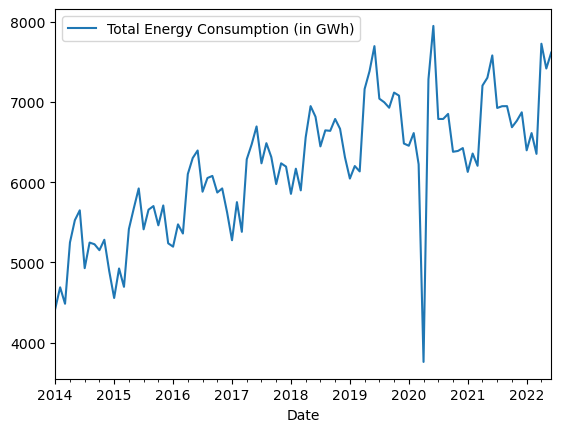

In [6]:
df.plot()

### Splitting Dataset <a class="anchor" id="split"></a>

In [7]:
"""
Period 1: Pre-pandemic

TRAIN data = January 2014 - Jun 2018
TEST  data = July 2018 - March 2020 

"""
trainPre = df.loc[df.index <= '2018-06-01']
testPre = df.loc[(df.index > '2018-05-01') & (df.index <= '2020-03-01')]   # PLEASE CHECK
totalPre = df.loc[df.index <= '2020-03-01']

"""
Period 2: Pandemic

TRAIN data = January 2014 - March 2020
TEST  data = April 2018 - June 2022 

"""

trainPan = df.loc[df.index <= '2020-03-01'] 
testPan = df.loc[(df.index > '2020-02-01') & (df.index <= '2022-06-01')]
totalPan = df.loc[df.index <= '2022-06-01']

#### Test and Training Set Graphs <a class="anchor" id="graph"></a>

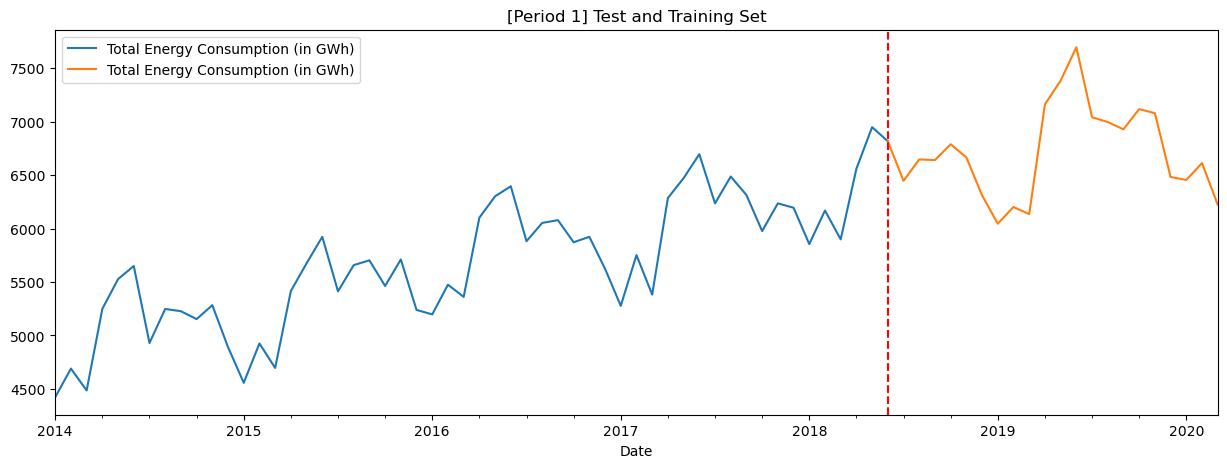

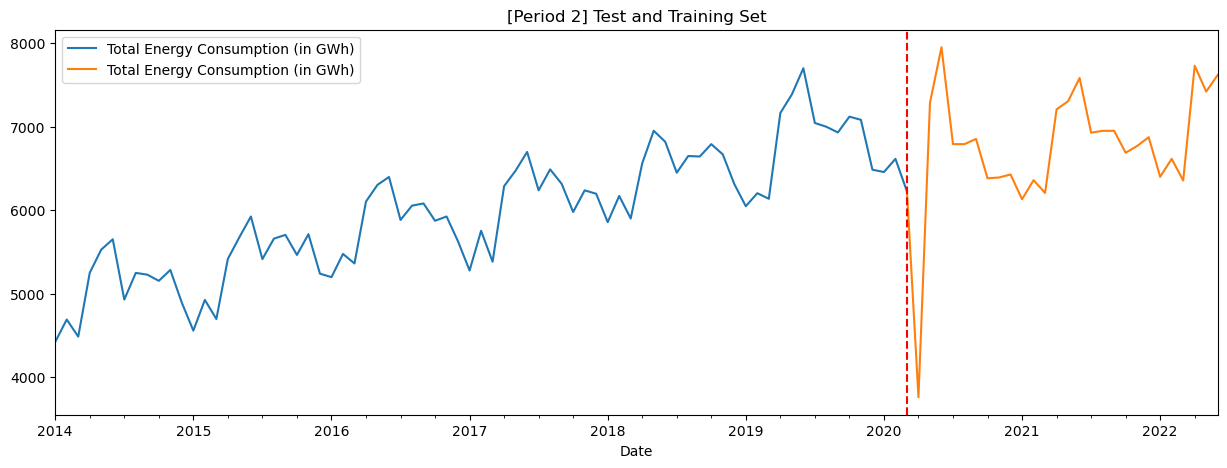

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))
trainPre.plot(ax=ax, label="Training Set")
testPre.plot(ax=ax, label="Test Set")
ax.axvline('2018-06-01', color='red', ls='--')

plt.title("[Period 1] Test and Training Set")
plt.show()

fig, ax = plt.subplots(figsize=(15, 5))
trainPan.plot(ax=ax, label="Training Set")
testPan.plot(ax=ax, label="Test Set")
ax.axvline('2020-03-01', color='red', ls='--')

plt.title("[Period 2] Test and Training Set")
plt.show()

### Create Features <a class="anchor" id="features"></a>

In [9]:
def create_features(df):
    """
    Create time series features based on time series index
    """
    
    df = df.copy()
    df['Quarter'] = df.index.quarter
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    df['Day of Year'] = df.index.dayofyear
    return df

df = create_features(df)

In [10]:
FEATURES = ['Quarter', 'Month', 'Year', 'Day of Year']
TARGET = ['Total Energy Consumption (in GWh)']

#### Period 1: Create Features for Train and Test Data <a class="anchor" id="period1"></a>

In [11]:
trainPre = create_features(trainPre)
testPre = create_features(testPre)

##### Initialize Training and Testing Data <a class="anchor" id="initialize1"></a>

In [12]:
X_trainPre = trainPre[FEATURES]
y_trainPre = trainPre[TARGET]

X_testPre = testPre[FEATURES]
y_testPre = testPre[TARGET]

#### Period 2: Create Features for Train and Test  <a class="anchor" id="period2"></a>

In [13]:
trainPan = create_features(trainPan)
testPan = create_features(testPan)

##### Initialize Training and Testing Data <a class="anchor" id="initialize2"></a>

In [14]:
X_trainPan = trainPan[FEATURES]
y_trainPan = trainPan[TARGET]

X_testPan = testPan[FEATURES]
y_testPan = testPan[TARGET]

***
## Implementation of Machine Learning Algorithms <a class="anchor" id="implementation"></a>
***

## Random Forest (RF) Model <a class="anchor" id="rf"></a>
***

In [15]:
randomForestModel = RandomForestRegressor(n_estimators=10000, max_features=4, random_state=1)

***
### PERIOD 1: Pre-Pandemic <a class="anchor" id="period1RF"></a>
***

#### Model Fitting <a class="anchor" id="fittingRFPre"></a>

In [16]:
randomForestModel.fit(X_trainPre, y_trainPre)

/tmp/ipykernel_11626/997050837.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestModel.fit(X_trainPre, y_trainPre)


RandomForestRegressor(max_features=4, n_estimators=10000, random_state=1)

#### Predictions <a class="anchor" id="predictionsRFPre"></a>

In [17]:
predRandomForest_pre = randomForestModel.predict(X_testPre)

# Make a new column in test dataframe: predictions for period 1
testPre["[Period 1] RF Predictions"] = predRandomForest_pre

#### Data Visualization <a class="anchor" id="datavisualRFPre"></a>

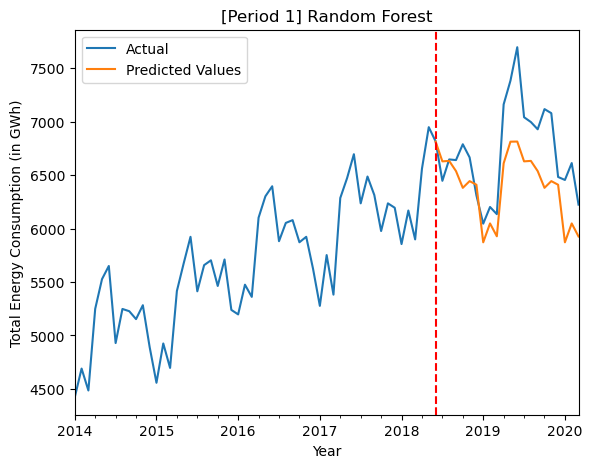

In [18]:
ax = totalPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] RF Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2018-06-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Random Forest")
plt.legend(loc="upper left")

plt.show()

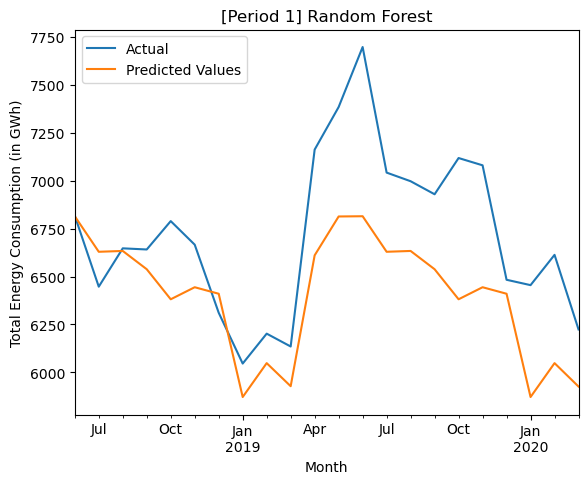

In [19]:
ax = testPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] RF Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Random Forest")
plt.legend(loc="upper left")

plt.show()

***
### PERIOD 2: Pandemic <a class="anchor" id="period2RF"></a>
***

#### Model Fitting <a class="anchor" id="fittingRFPan"></a>

In [20]:
randomForestModel.fit(X_trainPan, y_trainPan)

/tmp/ipykernel_11626/1907178356.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForestModel.fit(X_trainPan, y_trainPan)


RandomForestRegressor(max_features=4, n_estimators=10000, random_state=1)

#### Predictions <a class="anchor" id="predictionsRFPan"></a>

In [21]:
predRandomForest_pan = randomForestModel.predict(X_testPan)

# Make a new column in test dataframe: predictions for period 2
testPan["[Period 2] RF Predictions"] = predRandomForest_pan

#### Data Visualization <a class="anchor" id="datavisualRFPan"></a>

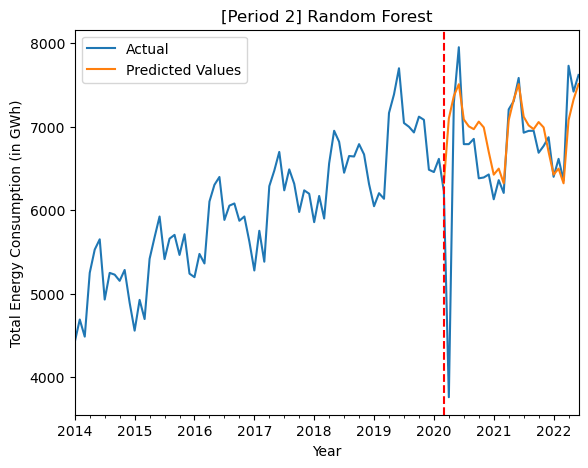

In [22]:
ax = totalPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] RF Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2020-03-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Random Forest")
plt.legend(loc="best")

plt.show()

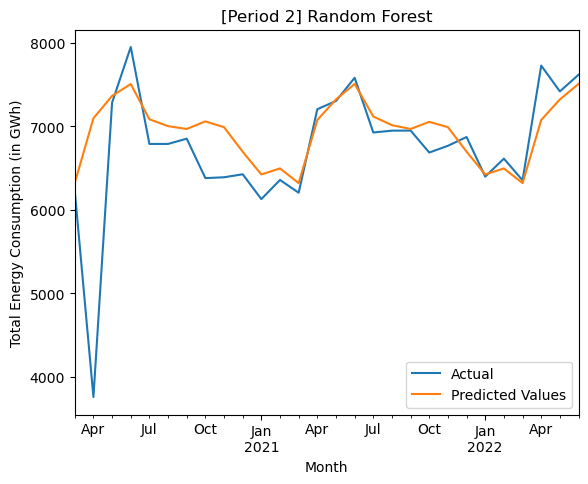

In [23]:
ax = testPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] RF Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Random Forest")
plt.legend(loc="best")

plt.show()

***
### Evaluation Metric <a class="anchor" id="evalRF"></a>
***

#### Root Mean Square Error (RMSE) <a class="anchor" id="rmseRF"></a>

In [24]:
rmsePre_RF = mean_squared_error(y_testPre, predRandomForest_pre, squared=False)
rmsePan_RF = mean_squared_error(y_testPan, predRandomForest_pan, squared=False)

print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(1, rmsePre_RF))
print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(2, rmsePan_RF))

The Root Mean Square Error (RMSE) of Period 1 is 422.73690597202904
The Root Mean Square Error (RMSE) of Period 2 is 687.6654615882316


#### Mean Absolute Percentage Error (MAPE) <a class="anchor" id="mapeRF"></a>

In [25]:
mapePre_RF = mean_absolute_percentage_error(y_testPre, predRandomForest_pre)
mapePan_RF = mean_absolute_percentage_error(y_testPan, predRandomForest_pan)

print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(1, mapePre_RF))
print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(2, mapePan_RF))

The Mean Absolute Percentage Error (MAPE) of Period 1 is 0.050313804978411335
The Mean Absolute Percentage Error (MAPE) of Period 2 is 0.06123184926393242


***
## XGBoost <a class="anchor" id="xgb"></a>
***

In [26]:
xgBoostReg = xgb.XGBRegressor(n_estimators=10000)

***
### PERIOD 1: Pre-Pandemic <a class="anchor" id="period1XGB"></a>
***

#### Model Fitting <a class="anchor" id="fittingXGBPre"></a>

In [27]:
xgBoostReg.fit(X_trainPre, y_trainPre)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Predictions <a class="anchor" id="predictionsXGBPre"></a>

In [28]:
predXGBoost_pre = xgBoostReg.predict(X_testPre)

# Make a new column in test dataframe: predictions for period 1
testPre["[Period 1] XGBoost Predictions"] = predXGBoost_pre

#### Data Visualization <a class="anchor" id="datavisualXGBPre"></a>

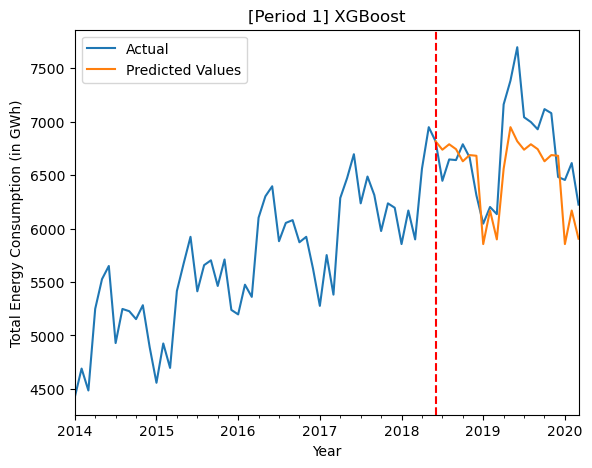

In [29]:
ax = totalPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] XGBoost Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2018-06-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] XGBoost")
plt.legend(loc="best")

plt.show()

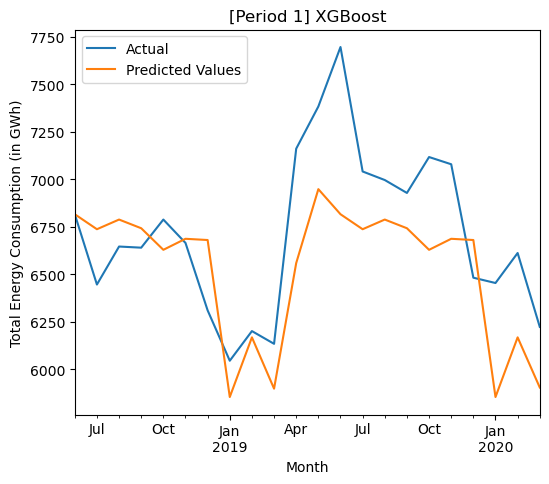

In [30]:
ax = testPre['Total Energy Consumption (in GWh)'].plot(figsize=(6, 5), label="Actual")
testPre["[Period 1] XGBoost Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] XGBoost")
plt.legend(loc="upper left")

plt.show()

***
### PERIOD 2: Pandemic <a class="anchor" id="period2XGB"></a>
***

#### Model Fitting <a class="anchor" id="fittingXGBPan"></a>

In [31]:
xgBoostReg.fit(X_trainPan, y_trainPan)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### Predictions <a class="anchor" id="predictionsXGBPan"></a>

In [32]:
predXGBoost_pan = xgBoostReg.predict(X_testPan)

# Make a new column in test dataframe: predictions for period 2
testPan["[Period 2] XGBoost Predictions"] = predXGBoost_pan

#### Data Visualization <a class="anchor" id="datavisualXGBPan"></a>

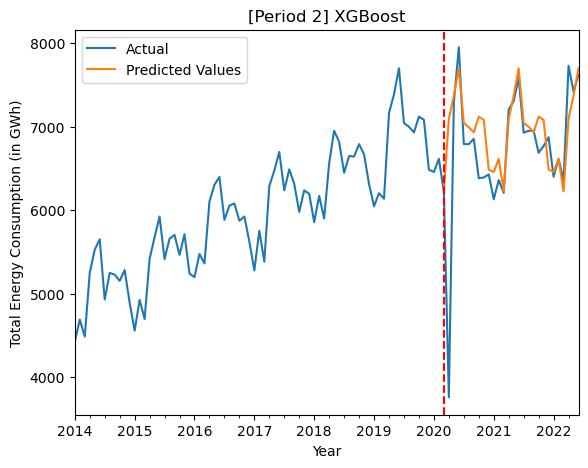

In [33]:
ax = totalPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] XGBoost Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2020-03-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] XGBoost")
plt.legend(loc="best")

plt.show()

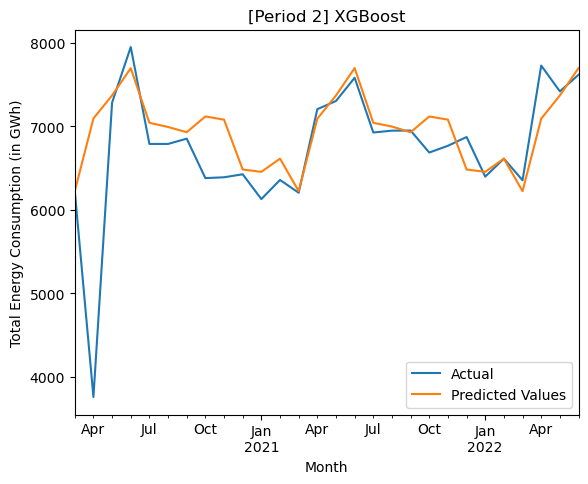

In [65]:
ax = testPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] XGBoost Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] XGBoost")
plt.legend(loc="lower right")

plt.show()

***
### Evaluation Metric <a class="anchor" id="evalXGB"></a>
***

#### Root Mean Square Error (RMSE) <a class="anchor" id="rmseXGB"></a>

In [35]:
rmsePre_XGB = mean_squared_error(y_testPre, predXGBoost_pre, squared=False)
rmsePan_XGB = mean_squared_error(y_testPan, predXGBoost_pan, squared=False)

print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(1, rmsePre_XGB))
print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(2, rmsePan_XGB))

The Root Mean Square Error (RMSE) of Period 1 is 366.69105214264033
The Root Mean Square Error (RMSE) of Period 2 is 692.0773419478434


#### Mean Absolute Percentage Error (MAPE) <a class="anchor" id="mapeXGB"></a>

In [36]:
mapePre_XGB = mean_absolute_percentage_error(y_testPre, predXGBoost_pre)
mapePan_XGB = mean_absolute_percentage_error(y_testPan, predXGBoost_pan)

print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(1, mapePre_XGB))
print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(2, mapePan_XGB))

The Mean Absolute Percentage Error (MAPE) of Period 1 is 0.04389061340496089
The Mean Absolute Percentage Error (MAPE) of Period 2 is 0.0607426242549743


***
## Linear Regression <a class="anchor" id="lr"></a>
***

In [37]:
linearReg = LinearRegression()

***
### PERIOD 1: Pre-Pandemic <a class="anchor" id="period1LR"></a>
***

#### Model Fitting <a class="anchor" id="fittingLRPre"></a>

In [38]:
linearReg.fit(X_trainPre, y_trainPre)

LinearRegression()

#### Predictions <a class="anchor" id="predictionsLRPre"></a>

In [39]:
predlinearReg_pre = linearReg.predict(X_testPre)

# Make a new column in test dataframe: predictions for period 1
testPre["[Period 1] Linear Regression Predictions"] = predlinearReg_pre

#### Data Visualization <a class="anchor" id="datavisualLRPre"></a>

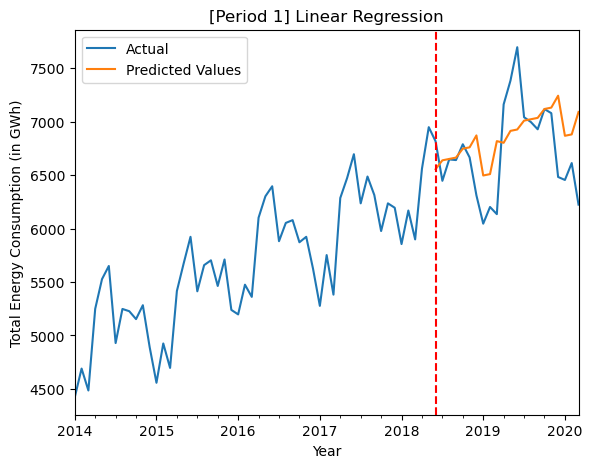

In [40]:
ax = totalPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] Linear Regression Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2018-06-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Linear Regression")
plt.legend(loc="upper left")

plt.show()

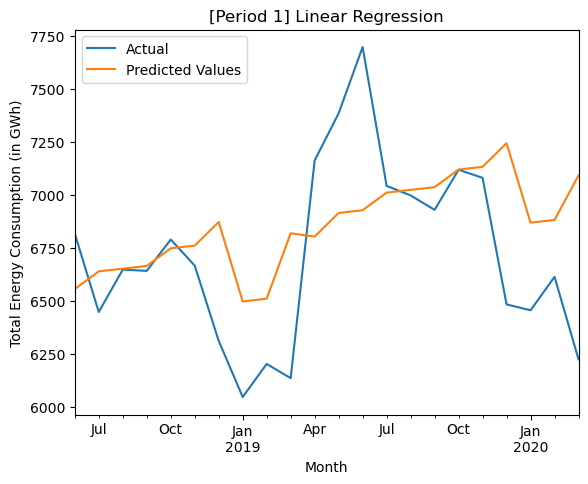

In [41]:
ax = testPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] Linear Regression Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Linear Regression")
plt.legend(loc="upper left")

plt.show()

***
### PERIOD 2: Pandemic <a class="anchor" id="period2LR"></a>
***

#### Model Fitting <a class="anchor" id="fittingLRPan"></a>

In [42]:
linearReg.fit(X_trainPan, y_trainPan)

LinearRegression()

#### Predictions <a class="anchor" id="redictionsLRPan"></a>

In [43]:
predlinearReg_pan = linearReg.predict(X_testPan)

# Make a new column in test dataframe: predictions for period 2
testPan["[Period 2] Linear Regression Predictions"] = predlinearReg_pan

#### Data Visualization <a class="anchor" id="datavisualLRPan"></a>

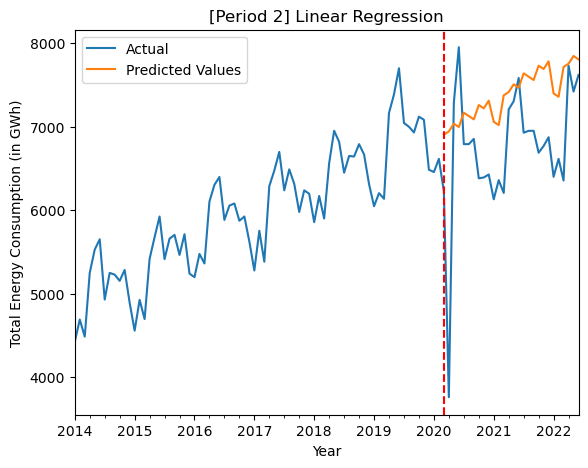

In [44]:
ax = totalPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] Linear Regression Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2020-03-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Linear Regression")
plt.legend(loc="upper left")

plt.show()

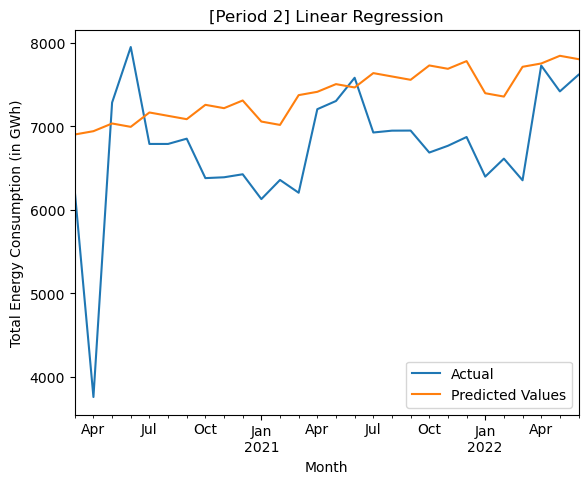

In [45]:
ax = testPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] Linear Regression Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Linear Regression")
plt.legend(loc="lower right")

plt.show()

***
### Evaluation Metric <a class="anchor" id="evalLR"></a>
***

#### Root Mean Square Error (RMSE) <a class="anchor" id="rmseLR"></a>

In [46]:
rmsePre_LR = mean_squared_error(y_testPre, predlinearReg_pre, squared=False)
rmsePan_LR = mean_squared_error(y_testPan, predlinearReg_pan, squared=False)

print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(1, rmsePre_LR))
print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(2, rmsePan_LR))

The Root Mean Square Error (RMSE) of Period 1 is 411.57813208038687
The Root Mean Square Error (RMSE) of Period 2 is 935.8795990021573


#### Mean Absolute Percentage Error (MAPE) <a class="anchor" id="mapeLR"></a>

In [47]:
mapePre_LR = mean_absolute_percentage_error(y_testPre, predlinearReg_pre)
mapePan_LR = mean_absolute_percentage_error(y_testPan, predlinearReg_pan)

print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(1, mapePre_LR))
print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(2, mapePan_LR))

The Mean Absolute Percentage Error (MAPE) of Period 1 is 0.04650345127560976
The Mean Absolute Percentage Error (MAPE) of Period 2 is 0.1229718727527561


***
## Support Vector Regression (SVR) <a class="anchor" id="svr"></a>
***

In [48]:
supportVectorReg = SVR(kernel='linear', C=10000, epsilon=10)

***
### PERIOD 1: Pre-Pandemic <a class="anchor" id="period1SVR"></a>
***

#### Model Fitting <a class="anchor" id="modellingSVRPre"></a>

In [49]:
supportVectorReg.fit(X_trainPre, y_trainPre)

/home/earl/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000, epsilon=10, kernel='linear')

#### Predictions <a class="anchor" id="fittingSVRPre"></a>

In [50]:
predSVR_pre = supportVectorReg.predict(X_testPre)

# Make a new column in test dataframe: predictions for period 1
testPre["[Period 1] SVR Predictions"] = predSVR_pre

#### Data Visualization <a class="anchor" id="datavisualSVRPre"></a>

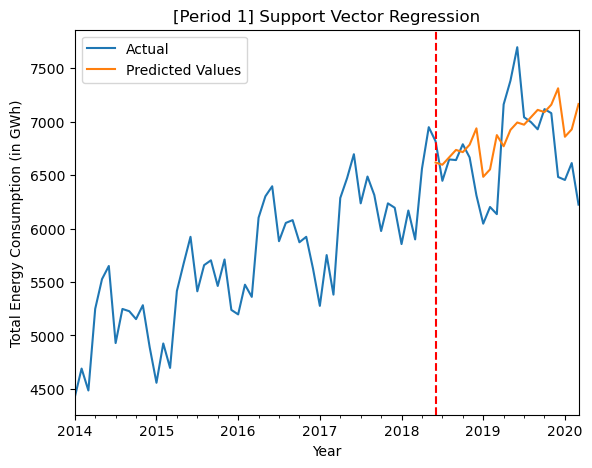

In [51]:
ax = totalPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] SVR Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2018-06-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Support Vector Regression")
plt.legend(loc="upper left")

plt.show()

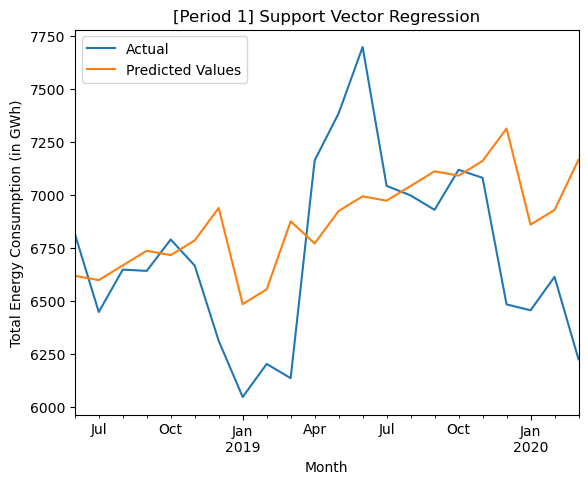

In [52]:
ax = testPre['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPre["[Period 1] SVR Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Support Vector Regression")
plt.legend(loc="upper left")

plt.show()

***
### PERIOD 2: Pandemic <a class="anchor" id="period2SVR"></a>
***

#### Model Fitting <a class="anchor" id="fittingSVRPan"></a>

In [53]:
supportVectorReg.fit(X_trainPan, y_trainPan)

/home/earl/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10000, epsilon=10, kernel='linear')

#### Predictions <a class="anchor" id="predictionsSVRPan"></a>

In [54]:
predSVR_pan = supportVectorReg.predict(X_testPan)

# Make a new column in test dataframe: predictions for period 2
testPan["[Period 2] SVR Predictions"] = predSVR_pan

#### Data Visualization <a class="anchor" id="datavisualSVRPan"></a>

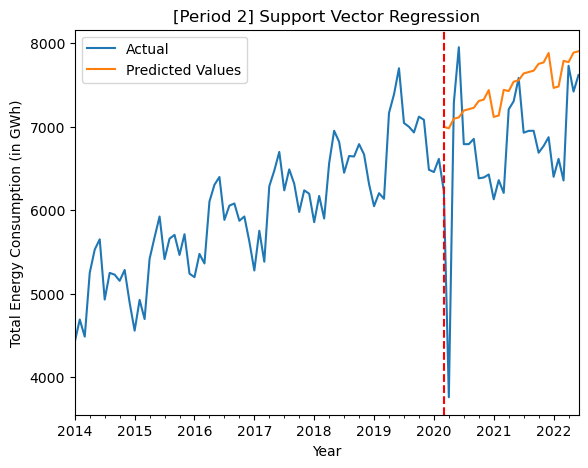

In [55]:
ax = totalPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] SVR Predictions"].plot(ax=ax, label="Predicted Values")
ax.axvline('2020-03-01', color='red', ls='--')

plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Support Vector Regression")
plt.legend(loc="upper left")

plt.show()

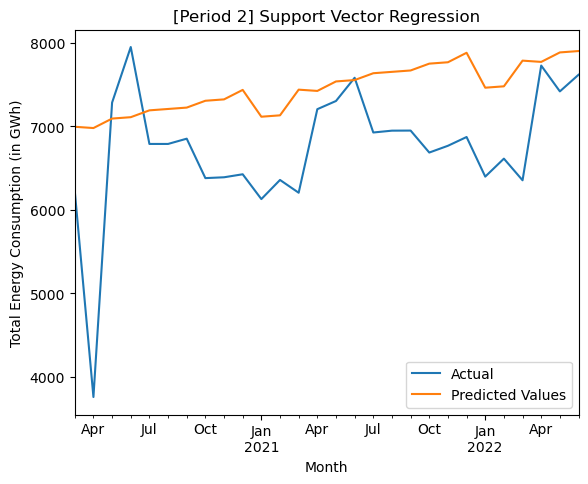

In [56]:
ax = testPan['Total Energy Consumption (in GWh)'].plot(figsize=(6.5, 5), label="Actual")
testPan["[Period 2] SVR Predictions"].plot(ax=ax, label="Predicted Values")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Support Vector Regression")
plt.legend(loc="lower right")

plt.show()

***
### Evaluation Metric <a class="anchor" id="evalSVR"></a>
***

#### Root Mean Square Error (RMSE) <a class="anchor" id="rmseSVR"></a>

In [57]:
rmsePre_SVR = mean_squared_error(y_testPre, predSVR_pre, squared=False)
rmsePan_SVR = mean_squared_error(y_testPan, predSVR_pan, squared=False)

print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(1, rmsePre_SVR))
print('The Root Mean Square Error (RMSE) of Period {} is {}'.format(2, rmsePan_SVR))

The Root Mean Square Error (RMSE) of Period 1 is 431.3655160869044
The Root Mean Square Error (RMSE) of Period 2 is 982.2024251498916


#### Mean Absolute Percentage Error (MAPE) <a class="anchor" id="mapeSVR"></a>

In [58]:
mapePre_SVR = mean_absolute_percentage_error(y_testPre, predSVR_pre)
mapePan_SVR = mean_absolute_percentage_error(y_testPan, predSVR_pan)

print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(1, mapePre_SVR))
print('The Mean Absolute Percentage Error (MAPE) of Period {} is {}'.format(2, mapePan_SVR))

The Mean Absolute Percentage Error (MAPE) of Period 1 is 0.050153305907061886
The Mean Absolute Percentage Error (MAPE) of Period 2 is 0.13113404512668295


## Results Graph Model <a class="anchor" id="resultsgraph"></a>

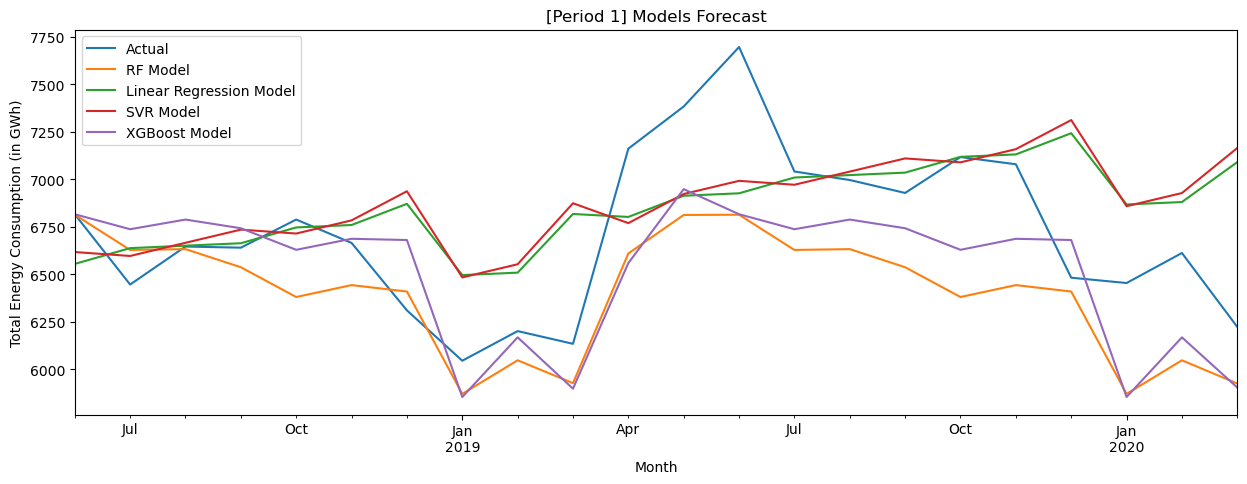

In [59]:
ax = testPre['Total Energy Consumption (in GWh)'].plot(figsize=(15, 5), label="Actual")
testPre["[Period 1] RF Predictions"].plot(ax=ax, label="RF Model")
testPre["[Period 1] Linear Regression Predictions"].plot(ax=ax, label="Linear Regression Model")
testPre["[Period 1] SVR Predictions"].plot(ax=ax, label="SVR Model")
testPre["[Period 1] XGBoost Predictions"].plot(ax=ax, label="XGBoost Model")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 1] Models Forecast")
plt.legend(loc="upper left")

plt.show()

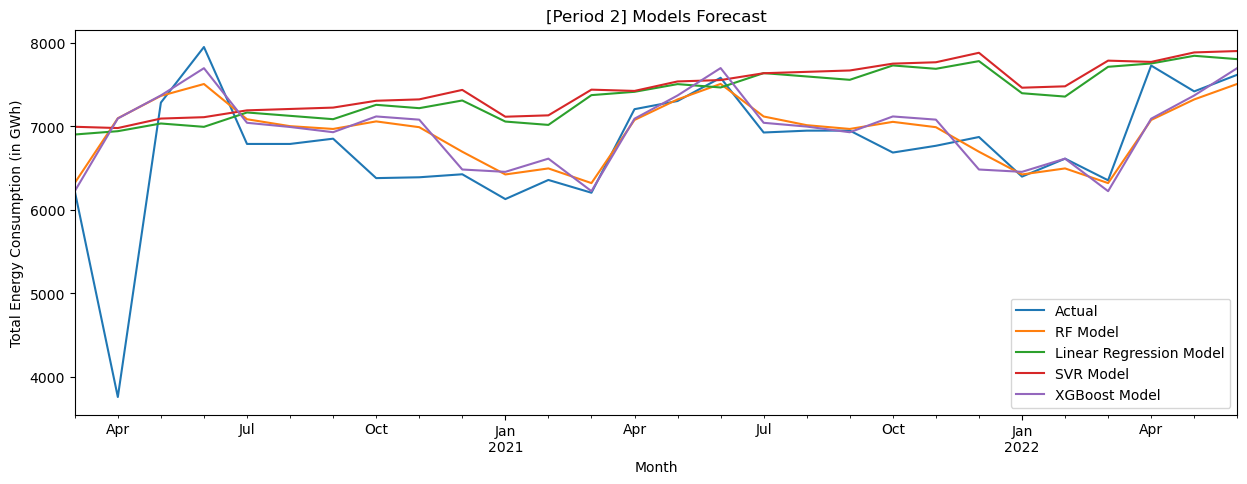

In [60]:
ax = testPan['Total Energy Consumption (in GWh)'].plot(figsize=(15, 5), label="Actual")
testPan["[Period 2] RF Predictions"].plot(ax=ax, label="RF Model")
testPan["[Period 2] Linear Regression Predictions"].plot(ax=ax, label="Linear Regression Model")
testPan["[Period 2] SVR Predictions"].plot(ax=ax, label="SVR Model")
testPan["[Period 2] XGBoost Predictions"].plot(ax=ax, label="XGBoost Model")

plt.xlabel("Month")
plt.ylabel("Total Energy Consumption (in GWh)")
plt.title("[Period 2] Models Forecast")
plt.legend(loc="lower right")

plt.show()

## Prediction Error Plots<a class="anchor" id="prederror"></a>


### Random Forest<a class="anchor" id="RFerror"></a>

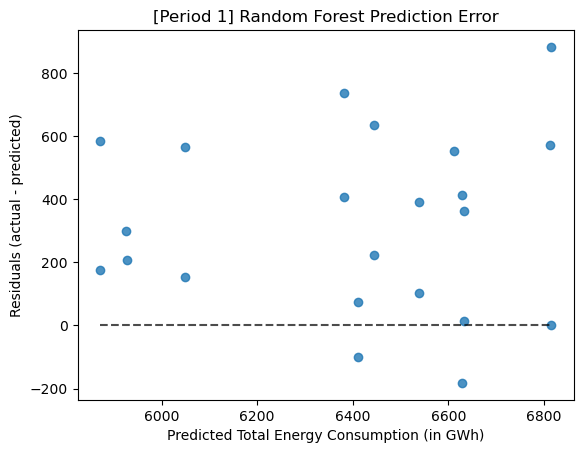

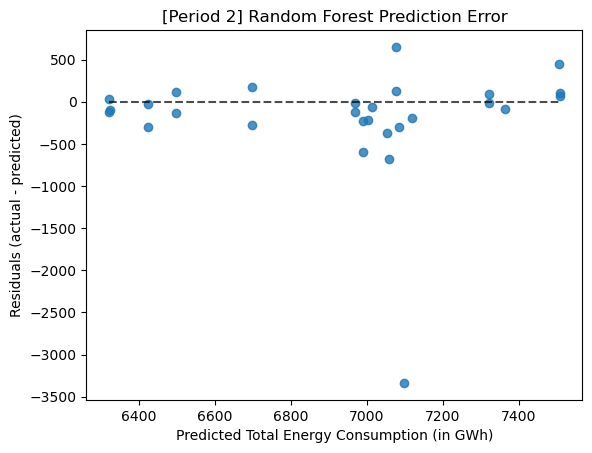

In [61]:
displayRFPre = PredictionErrorDisplay(y_true=testPre['Total Energy Consumption (in GWh)'], y_pred=testPre["[Period 1] RF Predictions"])
displayRFPre.plot()
plt.title('[Period 1] Random Forest Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()

displayRFPan = PredictionErrorDisplay(y_true=testPan['Total Energy Consumption (in GWh)'], y_pred=testPan["[Period 2] RF Predictions"])
displayRFPan.plot()
plt.title('[Period 2] Random Forest Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()
# diffRFPre = testPre['Total Energy Consumption (in GWh)'] - testPre["[Period 1] RF Predictions"]
# diffRFPre.hist(bins = 22)
# #plt.title('[Period 1] Random Forest Prediction Error')
# plt.xlabel('RF prediction error')
# plt.ylabel('Frequency')

# plt.show()

# diffRFPre = testPre['Total Energy Consumption (in GWh)'] - testPre["[Period 1] Linear Regression Predictions"]
# diffRFPre.hist(bins = 22)
# plt.title('[Period] 1 Linear Regression Prediction Error]')
# plt.xlabel('Linear Regression prediction error')
# plt.ylabel('Frequency')

# plt.show()

### XGBoost<a class="anchor" id="XGBerror"></a>

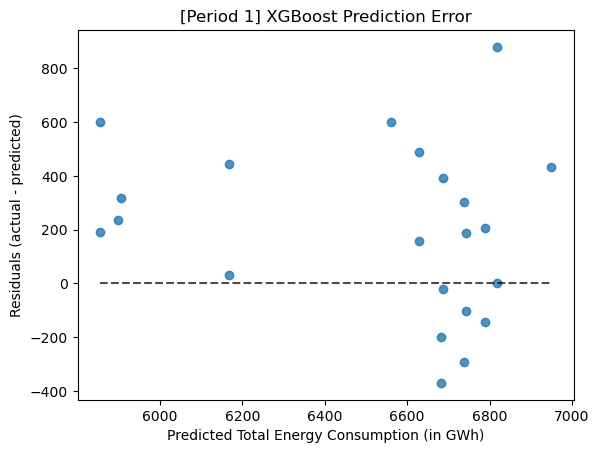

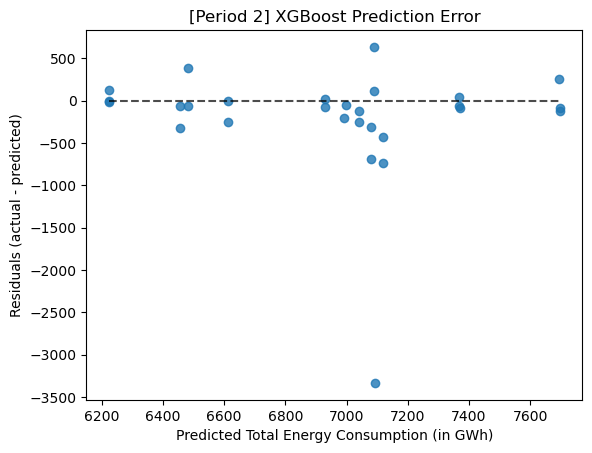

In [62]:
displayXGBPre = PredictionErrorDisplay(y_true=testPre['Total Energy Consumption (in GWh)'], y_pred=testPre["[Period 1] XGBoost Predictions"])
displayXGBPre.plot()
plt.title('[Period 1] XGBoost Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()

displayRFPan = PredictionErrorDisplay(y_true=testPan['Total Energy Consumption (in GWh)'], y_pred=testPan["[Period 2] XGBoost Predictions"])
displayRFPan.plot()
plt.title('[Period 2] XGBoost Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()


### Linear Regression<a class="anchor" id="LRerror"></a>

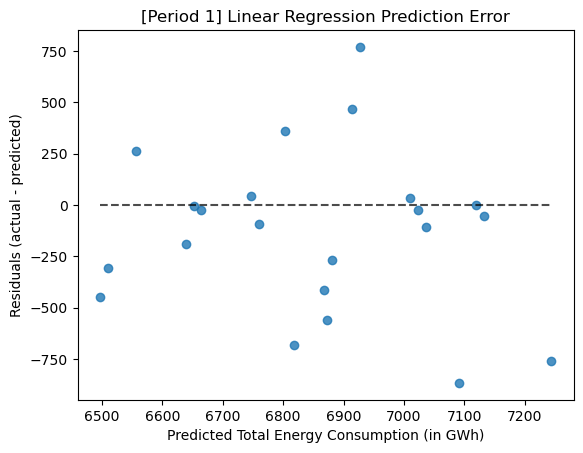

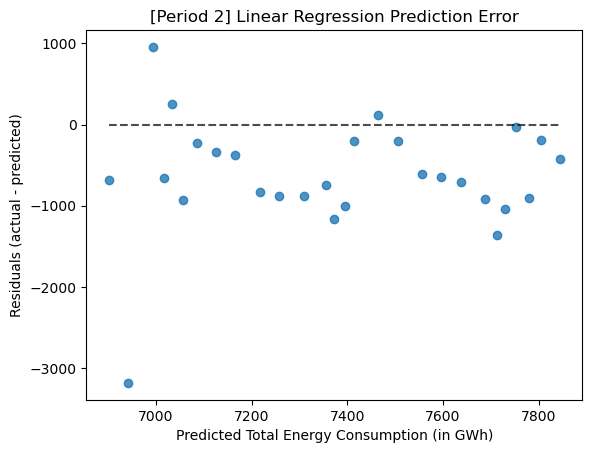

In [63]:
displayLRPre = PredictionErrorDisplay(y_true=testPre['Total Energy Consumption (in GWh)'], y_pred=testPre["[Period 1] Linear Regression Predictions"])
displayLRPre.plot()
plt.title('[Period 1] Linear Regression Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()

displayLRPan = PredictionErrorDisplay(y_true=testPan['Total Energy Consumption (in GWh)'], y_pred=testPan["[Period 2] Linear Regression Predictions"])
displayLRPan.plot()
plt.title('[Period 2] Linear Regression Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()


### Support Vector Regression<a class="anchor" id="SVRerror"></a>

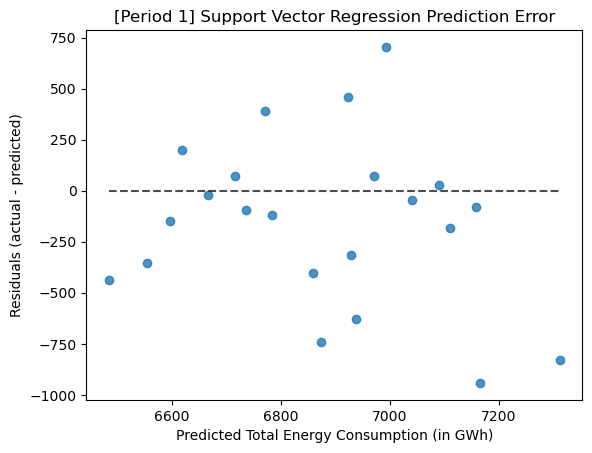

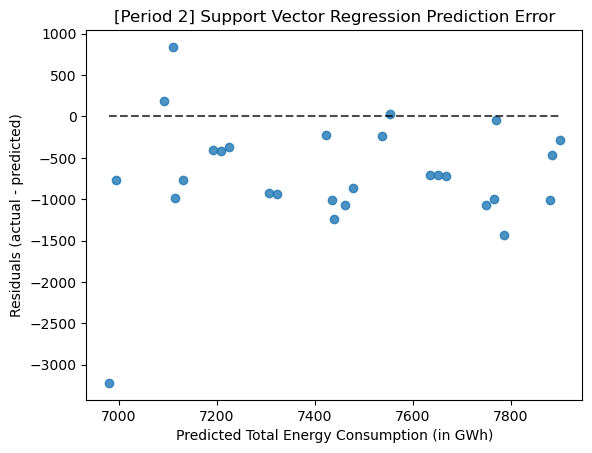

In [64]:
displaySVRPre = PredictionErrorDisplay(y_true=testPre['Total Energy Consumption (in GWh)'], y_pred=testPre["[Period 1] SVR Predictions"])
displaySVRPre.plot()
plt.title('[Period 1] Support Vector Regression Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()

displaySVRPan = PredictionErrorDisplay(y_true=testPan['Total Energy Consumption (in GWh)'], y_pred=testPan["[Period 2] SVR Predictions"])
displaySVRPan.plot()
plt.title('[Period 2] Support Vector Regression Prediction Error')
plt.xlabel("Predicted Total Energy Consumption (in GWh)")
plt.show()